# Project 4

## Problem Statement
Dataset Link
https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libraries for Time series model
from pandas.tools.plotting import autocorrelation_plot  # for autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf

# ARIMA model libraries
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

# for date time conversion
import datetime

import sys

# for interactive potting
import seaborn as sns

# for stats model 
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

#visualization
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Users\ANURAG\Anaconda4\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Loading dataset

In [2]:
df = pd.read_csv('data_stocks.csv')

In [3]:
# top5 instances
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


### to apply PCA for Kmean clustering we drop two of the columns which are DATE and SP500 index

In [4]:
stock=df.drop(columns=['DATE','SP500'],inplace=True,axis=1) # dropping the columns

In [5]:
df.shape # rows and columns

(41266, 500)

In [6]:
df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# Problem 2:
#### How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

## PCA

Idea behind PCA is to reduce dimentionality of the data set without loosing the significant information. Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! As an added benefit, each of the “new” variables after PCA are all independent of one another. for the problem above we want to use clustering in order to witness unique pattern in the existing dataset. If we run K means clustering using 502 features, it will be computationally expensive and it might get stuck and we'll loose our time. Instead of doing that we are applying PCA with only 3 principal compenents.

In [7]:
#Import PCA
from sklearn.decomposition import PCA

In [8]:
# create an instance of the PCA
pca=PCA(n_components=3)

In [9]:
#fitting dataset
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
# transformed dataframe to reduce dimension from 500 to 3
df_reduced=pca.transform(df)

In [13]:
# now shape of the transformed dataframe
df_reduced.shape

(41266, 3)

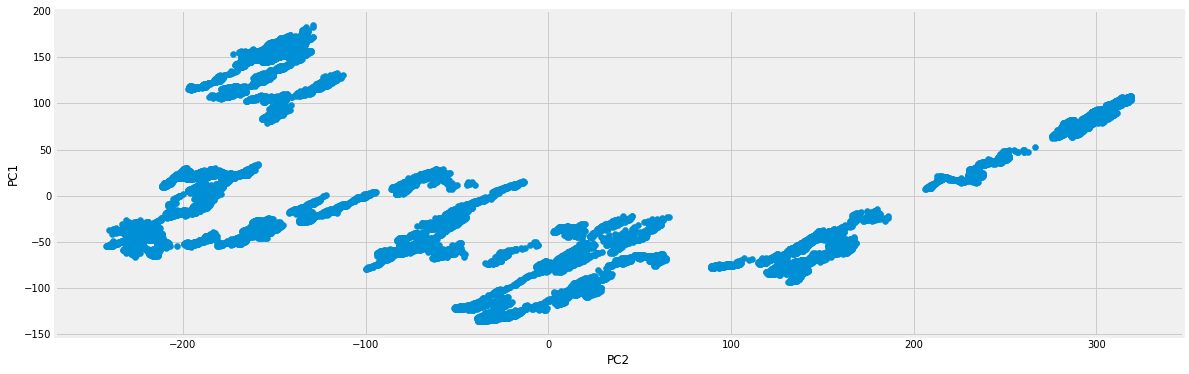

In [14]:
# scatter plot between PC1 and PC2
plt.figure(figsize=(18,6))
plt.scatter(df_reduced[:,0],df_reduced[:,1])
plt.ylabel('PC1')
plt.xlabel('PC2')

plt.show()

In [15]:

df_reduced[:1].shape

(1, 3)

## Kmeans

Here we are using k means clustering to group the stocks based on months. this is helpful in understanding whether two stocks are related to each other based on the months. clusters are created based on months.

In [14]:
# applying kmeans clustering to determne the homogenious grous present in the dataset.
from sklearn.cluster import KMeans as km

In [15]:
# pca._explained_variance_ tells how much variance is explained by the principal component.
pca.explained_variance_

array([29552.09265369,  6861.74983656,  3733.21310127])

In [16]:
df_reduced

array([[ 306.7014591 ,   83.2240155 ,   60.07857695],
       [ 303.07353165,   79.13615476,   60.77302358],
       [ 301.07978706,   78.29811525,   58.19185706],
       ...,
       [-195.96140814,  118.43969002,  -59.58416424],
       [-195.00245926,  118.98135157,  -59.20880889],
       [-196.53458095,  117.44181957,  -60.4663573 ]])

In [17]:
# create a copy of the transformed dataframe.

df2=df_reduced.copy()

In [19]:
### we are going to calculate kmeans.inertia which tells the Sum of squared distances of samples to their closest cluster center.
k=[]
inertia=[] # empty list to append kmeans inertia values for k=2 to 10
for i in range(2,10):
    kmeans=km(n_clusters=i)
    kmeans.fit(df2) #fitting df2 
    k.append(i)
    inertia.append(kmeans.inertia_)

In [20]:
k

[2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
inertia # here we have got 8 values whichever is smallest , we'll select the respective K and that is our K for clustering

[696465712.1408991,
 401139266.108141,
 240947453.44814306,
 119415116.52315418,
 90075123.50200172,
 75991808.0860175,
 63542411.526400074,
 55101460.44519464]

In [22]:
kmean=km(n_clusters=5) # instaintiating the object

In [25]:
kmean.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
pred= kmean.predict(df2) # predicting df2

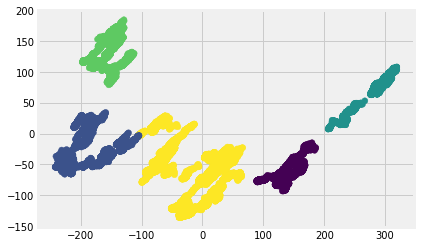

In [27]:
# to see clusters in the dataset we'll plot the scatter plot and filtered by pred. by putting c=pred we have applied filter 
# and now we see 5 clusters in the plot.

plt.scatter(df2[:,0],df2[:,1],c=pred)

In [28]:
df.shape #original dataset

(41266, 500)

In [29]:
df2.shape # transformed dataset with 3 principal components

(41266, 3)

In [37]:
pred.shape

(41266,)

In [42]:
df = pd.read_csv('data_stocks.csv')

In [43]:
df['pred']=pred

In [44]:
df.shape

(41266, 503)

In [45]:
# created a dateTime column by converting existing column into date time
from datetime import datetime
df['NDATE']=pd.to_datetime(df['DATE'],unit='s')


In [47]:
#for centeroid in range(5):
    #df.loc[df['pred']==centeroid]

To achieve unique pattern in data we applied k mean clustering to cluster data and found the interesting insight that clusters are 
created on the basis of month of dates. e.g below line where we filtered the data with cluster=3 belongs to month April.

In [48]:
df.loc[df['pred']==3]

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,pred,NDATE
34619,1502285400,2465.4399,49.7400,159.2500,146.6800,78.5000,108.5100,107.7400,47.1800,136.0800,...,48.5600,44.280,80.2900,32.0200,59.8300,74.1300,113.9500,60.0000,3,2017-08-09 13:30:00
34620,1502285460,2464.7400,49.6400,159.7100,146.8600,78.3600,108.6100,106.9800,47.3295,135.6100,...,48.5300,44.155,80.2700,31.9900,59.9000,73.7700,113.7200,60.2416,3,2017-08-09 13:31:00
34621,1502285520,2465.5701,49.5271,159.8600,146.5600,78.1400,108.8600,106.6600,47.3400,135.6601,...,48.4900,44.210,80.2073,32.0300,59.9000,74.0800,113.9300,60.1200,3,2017-08-09 13:32:00
34622,1502285580,2467.8401,49.4950,159.6400,146.6600,78.2100,108.6500,107.0150,47.2800,135.7800,...,48.4600,44.210,80.1300,32.0500,59.9000,74.0400,113.9700,59.8700,3,2017-08-09 13:33:00
34623,1502285640,2468.0901,49.2800,159.8600,146.7000,78.2300,108.6700,107.3300,47.2700,136.0200,...,48.4800,44.210,80.1930,32.0500,59.8900,73.8100,113.9400,59.8694,3,2017-08-09 13:34:00
34624,1502285700,2468.0000,49.3494,159.9114,146.5900,78.2850,108.7700,107.4700,47.1300,136.1200,...,48.5000,44.310,80.1552,32.0500,59.9200,73.9000,113.6800,59.8500,3,2017-08-09 13:35:00
34625,1502285760,2467.4800,49.4400,160.1298,146.7800,78.2900,108.4542,107.2700,47.1719,136.2500,...,48.5000,44.290,80.1100,32.0800,59.9500,74.1100,113.7170,60.1150,3,2017-08-09 13:36:00
34626,1502285820,2466.5300,49.3800,160.2000,146.7000,78.0000,108.4800,107.2000,47.0100,136.0100,...,48.5475,44.270,80.1400,32.1100,59.9600,74.0150,113.7170,60.1200,3,2017-08-09 13:37:00
34627,1502285880,2466.1699,49.3400,159.9000,146.6810,77.8400,108.6800,107.0350,46.9900,135.5900,...,48.5200,44.270,80.1464,32.0800,59.9300,74.0100,114.0800,60.1000,3,2017-08-09 13:38:00
34628,1502285940,2465.5701,49.4600,159.8600,147.0800,77.8500,108.5200,107.1750,47.0000,135.7600,...,48.5100,44.240,80.1600,32.0600,59.8950,73.9800,113.6900,60.1600,3,2017-08-09 13:39:00


In [49]:
df.loc[df['pred']==4]

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,pred,NDATE
13685,1495546200,2398.4099,46.2700,154.9000,139.1600,82.2800,99.3700,113.2000,47.8600,111.5100,...,46.3100,41.8800,82.3200,6.990,52.1500,70.8200,117.7800,60.3100,4,2017-05-23 13:30:00
13686,1495546260,2396.8601,46.3115,154.6320,139.3760,81.7300,99.4200,113.6200,47.8900,112.0500,...,46.3450,41.9600,82.3700,6.990,52.3500,70.8700,118.2900,60.7200,4,2017-05-23 13:31:00
13687,1495546320,2397.0200,46.1100,154.0000,139.4900,81.6400,99.4400,113.6000,47.7900,111.8600,...,46.3700,41.9300,82.3400,6.990,52.3300,71.1200,118.1700,60.7200,4,2017-05-23 13:32:00
13688,1495546380,2397.0901,46.0650,154.1800,139.5500,81.7360,99.5200,113.8150,47.8200,112.4765,...,46.3600,41.9300,82.3400,6.980,52.3300,70.9350,118.1700,60.7900,4,2017-05-23 13:33:00
13689,1495546440,2396.3799,46.1500,154.2000,139.2500,81.6500,99.5300,113.8850,47.7950,112.2900,...,46.3700,41.9700,82.4410,6.985,52.3300,70.9000,118.1700,60.8350,4,2017-05-23 13:34:00
13690,1495546500,2396.1799,46.1300,154.0800,139.4632,81.6800,99.5100,113.8900,47.8595,111.9100,...,46.3900,41.9700,82.3800,6.980,52.3300,70.9400,117.9800,60.8650,4,2017-05-23 13:35:00
13691,1495546560,2396.7400,46.0600,154.1300,139.4700,81.4950,99.2100,114.1200,47.6700,112.0350,...,46.4150,41.9300,82.4047,6.980,52.3300,70.8900,117.9500,60.7700,4,2017-05-23 13:36:00
13692,1495546620,2396.9299,46.1600,154.3103,139.2200,81.5300,99.2600,113.9900,47.7100,111.9800,...,46.4100,41.9200,82.4500,6.985,52.0800,70.9000,117.9100,60.7100,4,2017-05-23 13:37:00
13693,1495546680,2396.7600,46.1800,154.3900,139.2000,81.6000,99.2400,113.8600,47.6964,111.9700,...,46.3900,41.9100,82.4600,6.985,52.0800,70.9500,118.0450,60.6800,4,2017-05-23 13:38:00
13694,1495546740,2397.6001,46.0700,154.2600,139.1400,81.4800,99.2600,113.5500,47.6400,111.1200,...,46.4129,41.8900,82.5200,6.960,52.0900,70.9100,118.0100,60.6800,4,2017-05-23 13:39:00


In [50]:
df.loc[df['pred']==1]

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,pred,NDATE
25694,1499438280,2417.8799,53.0899,144.0100,142.4100,77.9900,104.7200,103.9700,49.4000,122.8600,...,45.7750,44.6900,79.8399,28.6800,54.5200,73.0500,126.7900,62.5600,1,2017-07-07 14:38:00
25695,1499438340,2417.6299,53.1200,144.0400,142.3800,77.9900,104.7300,103.9200,49.3900,122.9100,...,45.7700,44.6850,79.8100,28.6650,54.5300,73.0600,126.7656,62.5400,1,2017-07-07 14:39:00
25696,1499438400,2418.3000,53.0900,143.9500,142.2900,77.9500,104.7100,103.9000,49.3500,122.8500,...,45.7950,44.7250,79.8650,28.6450,54.5100,73.0400,126.7600,62.5500,1,2017-07-07 14:40:00
25697,1499438460,2418.5200,53.0100,143.9800,142.2900,77.9350,104.7256,103.8800,49.4000,122.9100,...,45.7950,44.7556,79.9561,28.6550,54.5500,73.0500,126.7700,62.5500,1,2017-07-07 14:41:00
25698,1499438520,2419.3301,53.0400,144.0400,142.2700,77.9300,104.7300,103.9400,49.4000,122.8800,...,45.7900,44.7600,79.9900,28.6900,54.6000,73.0700,126.8300,62.5310,1,2017-07-07 14:42:00
25699,1499438580,2418.8301,53.0750,144.1050,142.3950,78.0200,104.8000,104.0100,49.4500,122.9700,...,45.7919,44.7900,79.9495,28.7125,54.6000,73.0450,126.9100,62.5450,1,2017-07-07 14:43:00
25700,1499438640,2418.2500,53.0500,144.0500,142.3603,77.9600,104.8300,104.0200,49.4400,122.9200,...,45.7900,44.7900,79.9600,28.7033,54.6000,73.0700,126.8400,62.5300,1,2017-07-07 14:44:00
25719,1499439780,2416.8899,52.8350,143.8300,141.8800,77.7900,104.9300,103.6350,49.3192,123.4300,...,45.7100,44.8500,80.0100,28.6500,54.4000,73.0400,127.0300,62.3800,1,2017-07-07 15:03:00
25720,1499439840,2417.6001,52.8000,143.8100,141.8800,77.7800,104.9000,103.6900,49.3400,123.4300,...,45.7300,44.8500,80.0200,28.6550,54.3800,73.0500,127.0000,62.3900,1,2017-07-07 15:04:00
25721,1499439900,2417.9199,52.7400,143.8950,141.9400,77.8400,104.9200,103.7200,49.3900,123.4787,...,45.7500,44.8600,80.0400,28.6800,54.3900,73.0900,127.0450,62.4500,1,2017-07-07 15:05:00


In [51]:
df.loc[df['pred']==2]

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,pred,NDATE
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.0400,102.2300,85.2200,59.7600,121.5200,...,44.4000,39.8800,82.0300,7.3600,50.2200,63.8600,122.0000,53.350,2,2017-04-03 13:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.0800,102.1400,85.6500,59.8400,121.4800,...,44.1100,39.8800,82.0300,7.3800,50.2200,63.7400,121.7700,53.350,2,2017-04-03 13:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.0300,102.2125,85.5100,59.7950,121.9300,...,44.0900,39.9800,82.0200,7.3600,50.1200,63.7500,121.7000,53.365,2,2017-04-03 13:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.0000,102.1400,85.4872,59.6200,121.4400,...,44.2500,39.9900,82.0200,7.3500,50.1600,63.8800,121.7000,53.380,2,2017-04-03 13:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.0350,102.0600,85.7001,59.6200,121.6000,...,44.1100,39.9600,82.0300,7.3600,50.2000,63.9100,121.6950,53.240,2,2017-04-03 13:34:00
5,1491226500,2365.6201,42.5399,143.7800,130.0700,82.0400,102.0400,85.9200,59.6100,121.7000,...,44.1500,39.9600,82.0300,7.3600,50.2000,63.8400,121.8500,53.220,2,2017-04-03 13:35:00
6,1491226560,2365.2000,42.4700,143.8640,130.1800,82.1200,102.3300,85.9120,59.5400,121.6300,...,44.2000,39.9800,82.0566,7.3650,50.3300,63.8300,122.1000,53.330,2,2017-04-03 13:36:00
7,1491226620,2365.2900,42.4700,143.8100,130.1400,82.1900,102.3700,85.8200,59.4100,121.6100,...,44.1200,39.9500,82.0000,7.3600,50.3000,63.8300,122.2800,53.370,2,2017-04-03 13:37:00
8,1491226680,2364.3201,42.3900,143.8150,130.1000,82.2300,102.3800,85.8800,59.4300,121.7150,...,44.1200,39.9300,81.9500,7.3700,50.2500,63.8500,121.8750,53.330,2,2017-04-03 13:38:00
9,1491226740,2364.6399,42.3300,143.8000,130.2100,82.1650,102.3300,85.8600,59.2600,121.8500,...,44.1700,39.8600,81.9000,7.3650,50.2200,63.8400,121.9300,53.400,2,2017-04-03 13:39:00


In [52]:
df.loc[df['pred']==0]

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,pred,NDATE
7038,1493386200,2390.9600,44.0200,144.0000,133.3900,77.9500,105.1800,90.7700,59.7500,127.7900,...,45.140,42.9100,82.4500,7.130,51.6600,65.800,117.7500,56.4500,0,2017-04-28 13:30:00
7039,1493386260,2390.8401,43.9300,143.8200,133.4800,77.7550,104.8800,90.5700,59.7800,127.7300,...,45.160,42.8200,82.3200,7.120,51.6300,65.730,118.0700,56.4500,0,2017-04-28 13:31:00
7040,1493386320,2390.5100,43.5500,143.6400,133.3100,77.7300,104.8100,90.7000,59.7600,127.6400,...,45.120,42.7400,82.2660,7.130,51.6300,65.580,117.4500,56.5200,0,2017-04-28 13:32:00
7041,1493386380,2389.8701,43.3900,143.7800,133.2700,77.6850,104.6200,90.4500,59.7200,127.8150,...,45.130,42.7800,82.2400,7.125,51.4800,65.700,117.8050,56.5800,0,2017-04-28 13:33:00
7042,1493386440,2389.8000,43.2200,143.8100,133.2900,77.6400,104.7100,90.3800,59.7000,128.3500,...,45.120,42.8000,82.1000,7.100,51.4800,65.710,117.6800,56.5100,0,2017-04-28 13:34:00
7043,1493386500,2389.3401,43.1500,143.8200,133.1250,77.6700,104.7600,90.4200,59.7400,128.4200,...,45.120,42.7500,82.0000,7.100,51.3753,65.870,117.6800,56.4800,0,2017-04-28 13:35:00
7044,1493386560,2389.2100,43.0650,143.7100,133.1200,77.6200,104.8100,90.3350,59.7400,128.4100,...,45.180,42.8400,82.0499,7.110,51.3500,65.770,117.7200,56.4600,0,2017-04-28 13:36:00
7045,1493386620,2388.5200,43.0425,143.7500,133.2600,77.4800,104.7500,90.3950,59.7700,128.4600,...,45.160,42.8500,82.0000,7.110,51.5100,65.730,117.4200,56.4700,0,2017-04-28 13:37:00
7046,1493386680,2388.7200,43.0200,143.5650,133.0100,77.5200,104.7900,90.3000,59.6800,128.3800,...,45.190,42.8100,82.1100,7.100,51.5100,65.735,117.3800,56.5200,0,2017-04-28 13:38:00
7047,1493386740,2388.7000,43.1299,143.6559,133.0050,77.5700,104.8500,90.3500,59.6800,128.1058,...,45.210,42.7900,82.0900,7.110,51.5700,65.740,117.2566,56.5700,0,2017-04-28 13:39:00


# Problem 3:
#### Identify which all stocks are moving together and which all stocks are different from each other.

In [56]:
df = pd.read_csv('data_stocks.csv')

In [57]:
df.drop(columns=['DATE','SP500'],inplace=True,axis=1)

In [59]:
cat_cols=df.columns
cat_cols

Index(['NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADI', 'NASDAQ.ADP',
       'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN', 'NASDAQ.AMAT',
       'NASDAQ.AMD',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=500)

In [60]:
df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [61]:
for cat in cat_cols:
    df["diff "+cat]=df[cat]-df[cat].shift(periods=1)

In [62]:
df.drop(cat_cols,axis=1,inplace=True)

In [63]:
df.shape

(41266, 500)

In [64]:
df.head()

,diff NASDAQ.AAL,diff NASDAQ.AAPL,diff NASDAQ.ADBE,diff NASDAQ.ADI,diff NASDAQ.ADP,diff NASDAQ.ADSK,diff NASDAQ.AKAM,diff NASDAQ.ALXN,diff NASDAQ.AMAT,diff NASDAQ.AMD,...,diff NYSE.WYN,diff NYSE.XEC,diff NYSE.XEL,diff NYSE.XL,diff NYSE.XOM,diff NYSE.XRX,diff NYSE.XYL,diff NYSE.YUM,diff NYSE.ZBH,diff NYSE.ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0300,0.0200,0.6900,0.040,-0.0900,0.4300,0.080,-0.04,0.02,0.10,...,0.000,0.000,-0.29,0.00,0.00,0.02,0.00,-0.12,-0.230,0.000
2,-0.0500,-0.0099,-0.0950,-0.050,0.0725,-0.1400,-0.045,0.45,-0.10,-0.07,...,0.215,0.225,-0.02,0.10,-0.01,-0.02,-0.10,0.01,-0.070,0.015
3,0.0600,-0.0501,-0.1521,-0.030,-0.0725,-0.0228,-0.175,-0.49,-0.07,-0.01,...,-0.125,0.000,0.16,0.01,0.00,-0.01,0.04,0.13,0.000,0.015
4,0.1678,0.0200,-0.1929,0.035,-0.0800,0.2129,0.000,0.16,0.09,0.04,...,0.010,0.350,-0.14,-0.03,0.01,0.01,0.04,0.03,-0.005,-0.140


In [65]:
df2= df.dropna()

In [69]:
df2.head()

,diff NASDAQ.AAL,diff NASDAQ.AAPL,diff NASDAQ.ADBE,diff NASDAQ.ADI,diff NASDAQ.ADP,diff NASDAQ.ADSK,diff NASDAQ.AKAM,diff NASDAQ.ALXN,diff NASDAQ.AMAT,diff NASDAQ.AMD,...,diff NYSE.WYN,diff NYSE.XEC,diff NYSE.XEL,diff NYSE.XL,diff NYSE.XOM,diff NYSE.XRX,diff NYSE.XYL,diff NYSE.YUM,diff NYSE.ZBH,diff NYSE.ZTS
1,0.0300,0.0200,0.6900,0.040,-0.0900,0.4300,0.080,-0.04,0.02,0.10,...,0.0000,0.000,-0.29,0.00,0.00,0.02,0.00,-0.12,-0.230,0.000
2,-0.0500,-0.0099,-0.0950,-0.050,0.0725,-0.1400,-0.045,0.45,-0.10,-0.07,...,0.2150,0.225,-0.02,0.10,-0.01,-0.02,-0.10,0.01,-0.070,0.015
3,0.0600,-0.0501,-0.1521,-0.030,-0.0725,-0.0228,-0.175,-0.49,-0.07,-0.01,...,-0.1250,0.000,0.16,0.01,0.00,-0.01,0.04,0.13,0.000,0.015
4,0.1678,0.0200,-0.1929,0.035,-0.0800,0.2129,0.000,0.16,0.09,0.04,...,0.0100,0.350,-0.14,-0.03,0.01,0.01,0.04,0.03,-0.005,-0.140
5,0.0021,0.1200,0.1900,0.005,-0.0200,0.2199,-0.010,0.10,0.02,0.01,...,0.0125,-0.030,0.04,0.00,0.00,0.00,0.00,-0.07,0.155,-0.020


In [66]:
df2.corr().to_csv('correlation_mat.csv')

In [67]:
### now to check the max correlation 

mat_df2=df2.corr()

In [68]:
mat_df2

,diff NASDAQ.AAL,diff NASDAQ.AAPL,diff NASDAQ.ADBE,diff NASDAQ.ADI,diff NASDAQ.ADP,diff NASDAQ.ADSK,diff NASDAQ.AKAM,diff NASDAQ.ALXN,diff NASDAQ.AMAT,diff NASDAQ.AMD,...,diff NYSE.WYN,diff NYSE.XEC,diff NYSE.XEL,diff NYSE.XL,diff NYSE.XOM,diff NYSE.XRX,diff NYSE.XYL,diff NYSE.YUM,diff NYSE.ZBH,diff NYSE.ZTS
diff NASDAQ.AAL,1.000000,0.174426,0.217080,0.178742,0.123543,0.176964,0.157573,0.001607,0.201468,0.169037,...,0.170238,0.040174,-0.023792,0.043705,0.077091,0.041886,0.146242,0.139152,0.255040,0.091314
diff NASDAQ.AAPL,0.174426,1.000000,0.418750,0.340841,0.134411,0.307407,0.216343,0.099733,0.426848,0.312322,...,0.161219,0.029748,-0.044910,0.072842,0.029744,0.078002,0.170238,0.140320,0.116605,0.117178
diff NASDAQ.ADBE,0.217080,0.418750,1.000000,0.339840,0.139378,0.405820,0.158988,0.128689,0.436495,0.364518,...,0.166740,-0.022685,-0.015124,0.055081,-0.037262,0.035395,0.162710,0.175532,0.119406,0.149031
diff NASDAQ.ADI,0.178742,0.340841,0.339840,1.000000,0.143097,0.257270,0.126521,0.118267,0.452126,0.364328,...,0.186068,0.033078,-0.013122,0.063393,0.020628,0.059339,0.167168,0.156105,0.070002,0.093062
diff NASDAQ.ADP,0.123543,0.134411,0.139378,0.143097,1.000000,0.106176,0.302908,0.036192,0.115974,0.110412,...,0.058912,0.007332,0.031436,0.044890,0.061540,0.032289,0.122797,0.101765,0.058821,0.069449
diff NASDAQ.ADSK,0.176964,0.307407,0.405820,0.257270,0.106176,1.000000,0.136093,0.115844,0.408567,0.271351,...,0.174889,0.023415,-0.009014,0.062099,0.041568,0.053731,0.173953,0.189018,0.094449,0.109624
diff NASDAQ.AKAM,0.157573,0.216343,0.158988,0.126521,0.302908,0.136093,1.000000,0.057771,0.170260,0.060920,...,0.098182,0.038104,0.004849,0.019059,0.036353,0.031311,0.103299,-0.032800,0.156012,0.110853
diff NASDAQ.ALXN,0.001607,0.099733,0.128689,0.118267,0.036192,0.115844,0.057771,1.000000,0.112638,0.101642,...,0.088928,0.026593,0.013280,0.062252,0.025694,0.244332,0.090905,0.084275,-0.010279,0.109212
diff NASDAQ.AMAT,0.201468,0.426848,0.436495,0.452126,0.115974,0.408567,0.170260,0.112638,1.000000,0.451389,...,0.185196,0.009664,-0.060509,0.080059,0.002512,0.055420,0.177074,0.170635,0.093555,0.110818
diff NASDAQ.AMD,0.169037,0.312322,0.364518,0.364328,0.110412,0.271351,0.060920,0.101642,0.451389,1.000000,...,0.148171,0.020307,-0.056275,0.055237,0.000723,0.024592,0.102351,0.140195,0.091157,0.074049


### By creating a correlation matrix we can determine which two stocks are highly correlated to each other.and intuition is those having higher correlation will move together. 

# Problem 1:
#### There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance.

In [70]:
stocks= pd.read_csv('data_stocks.csv') # import dataset 

In [71]:
stocks.head()# data at glance

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [72]:
stocks['New_date']=pd.to_datetime(stocks['DATE'],unit='s') # date conversion

In [91]:
#col=['New_date']+[i for i in stock.columns if i != 'New_date']

In [ ]:
### below I have created a variable which contains all the column names of the dataset

In [73]:
cols=stocks.columns.tolist()

In [74]:
cols = cols[-1:] + cols[:-1]

In [75]:
cols

['New_date',
 'DATE',
 'SP500',
 'NASDAQ.AAL',
 'NASDAQ.AAPL',
 'NASDAQ.ADBE',
 'NASDAQ.ADI',
 'NASDAQ.ADP',
 'NASDAQ.ADSK',
 'NASDAQ.AKAM',
 'NASDAQ.ALXN',
 'NASDAQ.AMAT',
 'NASDAQ.AMD',
 'NASDAQ.AMGN',
 'NASDAQ.AMZN',
 'NASDAQ.ATVI',
 'NASDAQ.AVGO',
 'NASDAQ.BBBY',
 'NASDAQ.BIIB',
 'NASDAQ.CA',
 'NASDAQ.CBOE',
 'NASDAQ.CELG',
 'NASDAQ.CERN',
 'NASDAQ.CHRW',
 'NASDAQ.CHTR',
 'NASDAQ.CINF',
 'NASDAQ.CMCSA',
 'NASDAQ.CME',
 'NASDAQ.COST',
 'NASDAQ.CSCO',
 'NASDAQ.CSX',
 'NASDAQ.CTAS',
 'NASDAQ.CTSH',
 'NASDAQ.CTXS',
 'NASDAQ.DISCA',
 'NASDAQ.DISCK',
 'NASDAQ.DISH',
 'NASDAQ.DLTR',
 'NASDAQ.EA',
 'NASDAQ.EBAY',
 'NASDAQ.EQIX',
 'NASDAQ.ESRX',
 'NASDAQ.ETFC',
 'NASDAQ.EXPD',
 'NASDAQ.EXPE',
 'NASDAQ.FAST',
 'NASDAQ.FB',
 'NASDAQ.FFIV',
 'NASDAQ.FISV',
 'NASDAQ.FITB',
 'NASDAQ.FLIR',
 'NASDAQ.FOX',
 'NASDAQ.FOXA',
 'NASDAQ.GILD',
 'NASDAQ.GOOG',
 'NASDAQ.GOOGL',
 'NASDAQ.GRMN',
 'NASDAQ.GT',
 'NASDAQ.HAS',
 'NASDAQ.HBAN',
 'NASDAQ.HOLX',
 'NASDAQ.HSIC',
 'NASDAQ.IDXX',
 'NASDAQ.ILMN',
 'NA

In [76]:
#removed two names from list of column names.
cols.remove('DATE')
cols.remove('SP500')


In [77]:
# Dropping columns from the dataset
stocks.drop(columns=['DATE','SP500'],axis=1,inplace=True)

In [78]:
stocks.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,New_date
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03 13:30:00
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03 13:31:00
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03 13:32:00
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03 13:33:00
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03 13:34:00


In [79]:
df=stocks[cols]

In [80]:
df.head()

,New_date,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [81]:
df.shape

(41266, 501)

### created date as index of the dataframe

In [82]:
df.set_index('New_date',inplace=True)

In [83]:
df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
New_date,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
2017-04-03 13:31:00,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2017-04-03 13:32:00,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
2017-04-03 13:33:00,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
2017-04-03 13:34:00,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [84]:
# transpose of the dataframe will interchange rows and columns
trans_df= df.transpose()

In [85]:
# transformed dataframe
trans_df.head()

New_date,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:51:00,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.390,42.330,...,44.72,44.73,44.76,44.75,44.71,44.720,44.73,44.740,44.71,44.74
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.815,143.800,...,164.16,164.06,164.19,164.20,164.14,164.110,164.12,164.010,163.88,163.98
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.100,130.210,...,155.06,155.01,155.12,155.09,155.04,155.090,155.16,155.065,154.96,155.16
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.230,82.165,...,83.71,83.70,83.63,83.69,83.66,83.670,83.65,83.620,83.58,83.69
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.380,102.330,...,106.62,106.56,106.62,106.60,106.63,106.565,106.59,106.520,106.40,106.47


In [86]:
# PCA instaintiated
princ_comp=PCA(n_components=3)

In [87]:
###Transformed dataset using PCA
trans_df_redu=princ_comp.fit_transform(trans_df)

In [88]:
trans_df_redu.shape

(500, 3)

## K means clustering for transformed dataseries

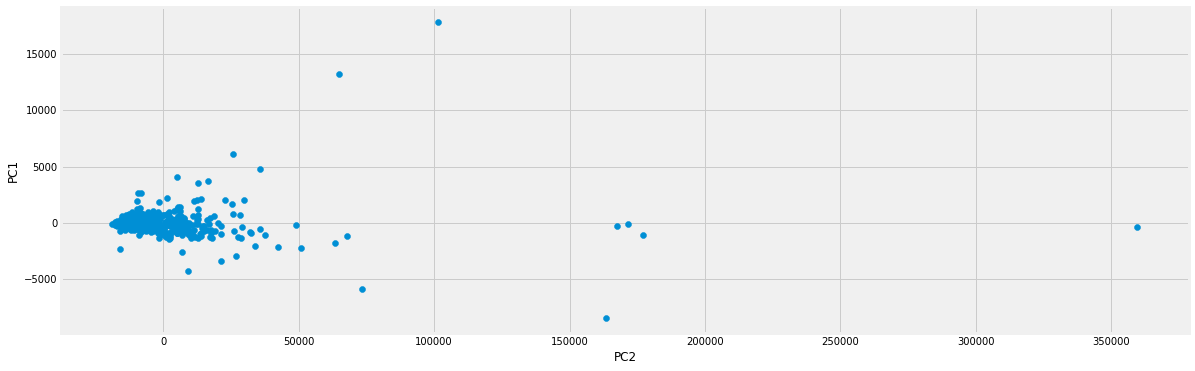

In [90]:
#plotting the PC1 and PC2
plt.figure(figsize=(18,6))
plt.scatter(trans_df_redu[:,0],trans_df_redu[:,1])
plt.ylabel('PC1')
plt.xlabel('PC2')

plt.show()

In [91]:
princ_comp.explained_variance_

array([6.83663380e+08, 1.88968326e+06, 3.64618121e+05])

### Below code is used to check what is the best value of K. selecting that value will be for kmeans clustering model.

In [92]:
k1=[]
inertia1=[]
for i in range(2,10):
    kmeans=km(n_clusters=i)
    kmeans.fit(trans_df)
    k1.append(i)
    inertia1.append(kmeans.inertia_)

In [93]:
inertia1

[123006116341.59377,
 70077213281.75235,
 38215217146.89998,
 21196874808.88073,
 13067853565.386963,
 8602418066.634865,
 6386281534.156868,
 4970342004.526426]

In [94]:
k1

[2, 3, 4, 5, 6, 7, 8, 9]

In [95]:
kmean=km(n_clusters=6)

In [96]:
kmean.fit(trans_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [97]:
ypred= kmean.predict(trans_df)

In [98]:
ypred

array([4, 3, 0, 0, 0, 0, 4, 0, 4, 4, 3, 1, 4, 3, 4, 3, 4, 0, 0, 4, 4, 5,
       0, 4, 0, 3, 4, 4, 0, 4, 0, 4, 4, 4, 0, 0, 4, 5, 4, 4, 4, 0, 4, 3,
       0, 0, 4, 4, 4, 4, 4, 1, 1, 4, 4, 0, 4, 4, 3, 3, 3, 0, 4, 4, 0, 1,
       0, 0, 0, 4, 3, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 3, 4, 0, 0, 4, 4, 3,
       4, 4, 4, 2, 4, 4, 4, 4, 5, 4, 4, 0, 0, 4, 0, 4, 0, 4, 4, 0, 4, 0,
       3, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 3, 4,
       4, 4, 0, 0, 3, 4, 4, 0, 4, 0, 0, 0, 0, 4, 3, 0, 0, 4, 3, 0, 4, 4,
       0, 0, 0, 4, 3, 0, 0, 0, 3, 5, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 5,
       4, 4, 3, 4, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 3, 0, 0,
       4, 5, 3, 4, 0, 4, 0, 4, 4, 0, 3, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 4,
       0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 4, 4, 4, 3, 0, 0, 4, 0, 4, 0, 4, 4, 4, 3, 4, 0, 4,
       4, 4, 0, 0, 4, 4, 3, 4, 4, 4, 4, 4, 0, 0, 4, 3, 3, 4, 4, 0, 0, 4,
       3, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 3, 3,

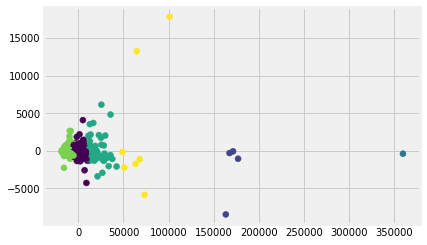

In [99]:
plt.scatter(trans_df_redu[:,0],trans_df_redu[:,1],c=ypred)

In [101]:
trans_df['ypred']=ypred

In [102]:
trans_df.head()

New_date,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,ypred
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.390,42.330,...,44.73,44.76,44.75,44.71,44.720,44.73,44.740,44.71,44.74,4
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.815,143.800,...,164.06,164.19,164.20,164.14,164.110,164.12,164.010,163.88,163.98,3
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.100,130.210,...,155.01,155.12,155.09,155.04,155.090,155.16,155.065,154.96,155.16,0
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.230,82.165,...,83.70,83.63,83.69,83.66,83.670,83.65,83.620,83.58,83.69,0
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.380,102.330,...,106.56,106.62,106.60,106.63,106.565,106.59,106.520,106.40,106.47,0


In [103]:
trans_df.loc[trans_df['ypred']==4]

New_date,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,ypred
NASDAQ.AAL,42.3300,42.3600,42.3100,42.3700,42.5378,42.5399,42.4700,42.4700,42.3900,42.3300,...,44.7300,44.7600,44.7500,44.710,44.7200,44.7300,44.7400,44.7100,44.740,4
NASDAQ.AKAM,59.7600,59.8400,59.7950,59.6200,59.6200,59.6100,59.5400,59.4100,59.4300,59.2600,...,47.1150,47.1250,47.1300,47.145,47.1500,47.1500,47.1500,47.1350,47.150,4
NASDAQ.AMAT,38.9900,39.0100,38.9100,38.8400,38.9300,38.9500,38.9600,38.9600,38.9125,38.8900,...,45.1650,45.1650,45.1800,45.130,45.1300,45.1300,45.1350,45.0650,45.120,4
NASDAQ.AMD,14.6100,14.7100,14.6400,14.6300,14.6700,14.6800,14.6563,14.6840,14.6942,14.6300,...,12.9900,12.9900,12.9950,12.985,12.9850,12.9850,12.9700,12.9650,13.000,4
NASDAQ.ATVI,49.8500,49.9400,49.8600,49.9150,49.9150,49.9700,50.0000,50.0200,50.0100,50.0100,...,65.5700,65.5300,65.5600,65.555,65.5800,65.5900,65.5400,65.4450,65.560,4
NASDAQ.BBBY,39.4300,39.6800,39.6000,39.5700,39.5500,39.5800,39.4900,39.5100,39.4950,39.4433,...,29.3000,29.3000,29.3000,29.300,29.3000,29.3000,29.3000,29.3000,29.300,4
NASDAQ.CA,31.7800,31.7800,31.7650,31.8300,31.8300,31.8300,31.7900,31.8100,31.8100,31.8000,...,33.2100,33.2150,33.2200,33.220,33.2000,33.2100,33.1900,33.1600,33.180,4
NASDAQ.CERN,58.8200,58.4950,58.4700,58.4200,58.6000,58.5200,58.5900,58.6100,58.5500,58.5300,...,67.7200,67.7300,67.6900,67.670,67.7200,67.7300,67.7200,67.7100,67.780,4
NASDAQ.CHRW,77.7250,77.9400,77.8150,77.9500,78.0500,78.0700,77.9700,78.0700,77.9950,77.9700,...,70.7950,70.7600,70.7200,70.700,70.6800,70.6400,70.6400,70.5850,70.635,4
NASDAQ.CMCSA,37.4700,37.5400,37.6100,37.6200,37.6250,37.6900,37.7650,37.7150,37.7100,37.6800,...,40.6250,40.6500,40.6500,40.660,40.6507,40.6250,40.6300,40.6000,40.610,4


In [104]:
trans_df.loc[trans_df['ypred']==5]

New_date,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,ypred
NASDAQ.CHTR,330.73,330.73,330.730,330.730,330.7300,330.7300,330.730,330.7300,330.73,330.730,...,398.25,397.970,397.9100,398.14,398.230,398.24,398.330,397.98,398.54,5
NASDAQ.EQIX,400.94,400.40,401.985,401.500,399.7704,399.7704,401.015,400.7900,400.15,399.795,...,468.61,468.575,468.1700,468.27,468.240,468.19,468.120,467.93,468.41,5
NASDAQ.REGN,388.00,390.16,389.890,390.375,390.5144,390.7350,390.105,390.1239,390.74,391.080,...,496.09,496.615,496.6100,496.56,496.600,496.63,496.770,496.59,496.90,5
NYSE.AZO,720.50,719.46,715.010,712.270,708.0000,704.3200,703.500,704.1500,704.15,706.110,...,528.55,528.410,528.5300,528.05,528.135,528.21,528.355,528.14,528.46,5
NYSE.BLK,385.20,385.20,385.200,383.330,384.1050,383.9800,384.041,384.0200,384.05,383.445,...,419.57,419.610,419.6900,419.55,419.290,419.28,419.270,418.94,418.96,5
NYSE.CMG,449.35,449.93,451.680,450.390,450.1000,449.9025,450.810,451.4662,451.27,451.861,...,316.55,316.600,316.4850,316.55,316.490,316.57,316.550,316.32,316.70,5
NYSE.SHW,309.90,311.50,311.500,311.500,311.5000,311.5000,311.500,311.5000,311.50,311.090,...,338.84,338.930,338.9238,338.88,338.680,338.82,338.790,338.54,339.20,5


In [105]:
trans_df.loc[trans_df['ypred']==3]

New_date,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,ypred
NASDAQ.AAPL,143.680,143.7000,143.6901,143.6400,143.6600,143.7800,143.8640,143.8100,143.8150,143.8000,...,164.0600,164.1900,164.2000,164.1400,164.1100,164.1200,164.0100,163.8800,163.980,3
NASDAQ.AMGN,164.630,164.6800,164.9050,164.7600,164.8500,164.9225,164.8200,164.7269,164.7050,164.7900,...,177.7400,177.8600,177.8600,177.8650,177.8512,177.7800,177.7600,177.6300,177.820,3
NASDAQ.AVGO,219.110,219.9800,219.3900,219.3000,219.1800,219.4900,219.7200,219.8700,219.8200,219.2701,...,252.0500,252.0700,252.0950,251.7900,251.9150,252.1200,252.0100,251.7600,252.070,3
NASDAQ.BIIB,274.080,273.9900,274.2750,273.5900,273.5400,274.1300,273.8700,274.0500,273.8700,274.3800,...,315.9700,316.0500,316.0200,316.0000,316.2000,316.5800,316.3200,316.3700,316.580,3
NASDAQ.COST,167.740,167.7760,168.0000,168.2000,168.0400,168.0950,168.0825,168.0100,167.9000,168.0440,...,156.7800,156.8800,156.8100,156.8000,156.8000,156.8200,156.8000,156.7300,156.740,3
NASDAQ.FB,141.940,141.8625,141.9100,141.8700,141.7800,141.9286,142.1500,142.0600,142.1500,142.0700,...,171.7550,171.8200,171.7900,171.7700,171.8200,171.8250,171.7500,171.6600,172.000,3
NASDAQ.HSIC,170.220,170.8150,170.8150,170.8150,170.8150,169.9750,169.9700,169.9700,169.9200,169.9200,...,173.7299,173.8300,173.8000,173.8400,173.8800,173.8900,173.8900,173.7100,173.680,3
NASDAQ.IDXX,155.070,155.4837,155.7100,155.5000,155.3500,155.3800,155.3411,155.4265,155.2950,155.4900,...,155.7800,155.7600,155.7800,155.6600,155.5800,155.6300,155.6200,155.3700,155.430,3
NASDAQ.ILMN,171.000,171.2950,171.0540,170.8200,170.8384,170.7150,171.3700,171.2700,170.9300,170.7700,...,204.0200,204.1400,204.1150,204.1000,204.1600,204.1900,204.2300,204.0700,204.460,3
NASDAQ.LRCX,128.530,128.6500,128.3100,128.2101,128.2200,128.5102,128.4301,128.4300,128.3050,128.2500,...,165.8200,165.8900,165.8800,165.7200,165.7800,165.9200,165.9100,165.7700,165.980,3


In [106]:
trans_df.loc[trans_df['ypred']==1]

New_date,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,ypred
NASDAQ.AMZN,888.55,887.1173,887.5110,886.2700,886.5800,886.8000,887.31,888.5997,889.80,888.8450,...,980.03,980.540,980.540,980.02,979.840,980.01,979.81,979.445,980.60,1
NASDAQ.GOOG,829.41,833.1000,835.9184,833.6200,835.3200,835.1400,835.30,835.8000,836.32,836.7050,...,938.70,938.800,938.960,938.75,938.800,938.67,938.13,937.680,939.33,1
NASDAQ.GOOGL,847.83,852.1700,854.2800,852.7800,854.7500,853.9700,854.25,854.8250,855.28,855.5775,...,954.17,954.540,954.660,954.54,954.505,954.47,953.88,953.465,955.24,1
NASDAQ.ISRG,766.47,766.5400,767.0300,766.5853,766.5853,766.5853,766.61,767.2650,767.98,766.7800,...,1004.43,1004.705,1004.875,1004.24,1004.400,1004.67,1004.04,1003.310,1004.67,1


In [107]:
trans_df.loc[trans_df['ypred']==0]

New_date,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,ypred
NASDAQ.ADBE,129.6300,130.3200,130.2250,130.0729,129.8800,130.0700,130.1800,130.140,130.1000,130.2100,...,155.0100,155.1200,155.0900,155.0400,155.0900,155.1600,155.0650,154.9600,155.160,0
NASDAQ.ADI,82.0400,82.0800,82.0300,82.0000,82.0350,82.0400,82.1200,82.190,82.2300,82.1650,...,83.7000,83.6300,83.6900,83.6600,83.6700,83.6500,83.6200,83.5800,83.690,0
NASDAQ.ADP,102.2300,102.1400,102.2125,102.1400,102.0600,102.0400,102.3300,102.370,102.3800,102.3300,...,106.5600,106.6200,106.6000,106.6300,106.5650,106.5900,106.5200,106.4000,106.470,0
NASDAQ.ADSK,85.2200,85.6500,85.5100,85.4872,85.7001,85.9200,85.9120,85.820,85.8800,85.8600,...,114.5100,114.5600,114.5150,114.4500,114.4900,114.5200,114.4700,114.3300,114.460,0
NASDAQ.ALXN,121.5200,121.4800,121.9300,121.4400,121.6000,121.7000,121.6300,121.610,121.7150,121.8500,...,142.4600,142.8750,142.8300,142.6300,142.4250,142.4500,142.3300,142.1700,142.410,0
NASDAQ.CBOE,81.0300,81.2100,81.2100,81.1300,81.1200,81.2200,81.1600,81.160,81.1600,81.1300,...,100.8800,100.8900,100.8800,100.8899,100.8900,100.8800,100.8600,100.8300,100.890,0
NASDAQ.CELG,124.8900,124.9900,125.0000,124.7300,124.8300,125.0800,125.1300,125.170,125.1100,125.1000,...,138.6000,138.6800,138.7190,138.7500,138.7353,138.7799,138.8600,138.7350,138.985,0
NASDAQ.CINF,72.4300,72.0400,72.0550,72.1400,72.2150,72.3000,72.4600,72.530,72.4800,72.2300,...,76.9400,76.9600,76.9800,76.9518,76.9250,76.9400,76.9100,76.8200,76.840,0
NASDAQ.CME,119.3850,118.8100,118.8300,118.6800,118.9350,118.7800,118.9800,118.960,119.0000,118.8100,...,125.9300,125.9900,126.0000,125.9600,125.9100,125.8900,125.8500,125.7800,125.800,0
NASDAQ.CTAS,126.8600,126.8600,126.9576,126.7000,126.8900,126.9500,126.8400,126.720,126.8700,126.8800,...,135.1100,135.0700,135.0800,135.0700,134.9800,135.0800,134.9800,134.9000,135.010,0


### every cluster (0,1,2,3,4) has homogenious stocks which are related to each other in some ways.